# Model: Logistic Regression Gender Only

https://www.kaggle.com/c/titanic/overview

**Initialization**

In [1]:
%run init.ipynb

In [39]:
from data.data import ExtractData, TransformData
from visualization.visualize import importance_plotting
from models import predict_model as pm
from zeetle.data import eda
from zeetle.visualization import visualize as zviz

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import (cross_val_score, 
                                     cross_val_score, cross_validate, 
                                    )

from yellowbrick.classifier import ConfusionMatrix

from sklearn import metrics


import matplotlib.pyplot as plt
import matplotlib

RANDOM_STATE = 42

## Define

def calc_logreg_model(X_train, y_train, X_test, y_test):

    print('feature list ...')
    print(f'{X_train.columns.tolist()}\n')
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train) 

    y_pred = pd.Series(logreg.predict(X_test), 
                       index=y_test.index, name='survived_pred').to_frame()

    scores = cross_val_score(logreg, X_train, y_train, cv=10)
    print(f"Cross Validation Accuracy Scores: {scores}")
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    
    return logreg, y_pred

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [3]:
Xy = pd.read_csv('../data/processed/train.csv', index_col='passengerid')
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,fare,embarked,title,last_name,cabin_number,family_size,age_estimate,age,age_bin,is_child,is_travelling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,Braund,21171.0,2,33.0,22.0,"(20.0, 30.0]",False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,Cumings,17599.0,2,35.9,38.0,"(30.0, 40.0]",False,False
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,3101282.0,1,22.0,26.0,"(20.0, 30.0]",False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,Futrelle,113803.0,2,35.9,35.0,"(30.0, 40.0]",False,False
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,Allen,373450.0,1,33.0,35.0,"(30.0, 40.0]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Mr,Montvila,211536.0,1,33.0,27.0,"(20.0, 30.0]",False,True
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,Graham,112053.0,1,22.0,19.0,"(10.0, 20.0]",False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,Johnston,6607.0,4,22.0,22.0,"(20.0, 30.0]",False,False


## Encode Categorical Columns

In [4]:
encoded_features = ['sex']

Xy_encoded = (pd.get_dummies(Xy[encoded_features], columns=encoded_features, drop_first=True)
              #.drop(['sex_male', 'pclass_2'], axis=1)
             )
Xy_encoded 

,sex_male
passengerid,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


## Train Test Split Data

In [5]:
X = Xy_encoded
y = Xy['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE)

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 534
Number of sample in test data = 357


### Logistic Regression

In [18]:
model, y_pred = pm.calc_logreg_model(X_train, y_train, X_test, y_test);

feature list ...
['sex_male']

Cross Validation Accuracy Scores: [0.8        0.94444444 0.81481481 0.73584906 0.69811321 0.71698113
 0.83018868 0.73584906 0.83018868 0.8490566 ]


Accuracy: 0.7955 (+/- 0.14229)




In [41]:
pm.calc_model_rst_table_metrics(model, X_train, y_train,)



Accuracy: 0.7958 (+/- 0.1158)
Recall: 0.6959 (+/- 0.1682)
Precision: 0.7455 (+/- 0.1621)
F1: 0.7189 (+/- 0.1585)


10/28/19, <model>, 0.7958, 0.6959,0.7455,0.7189, NS


# Visualize Confusion Matrix

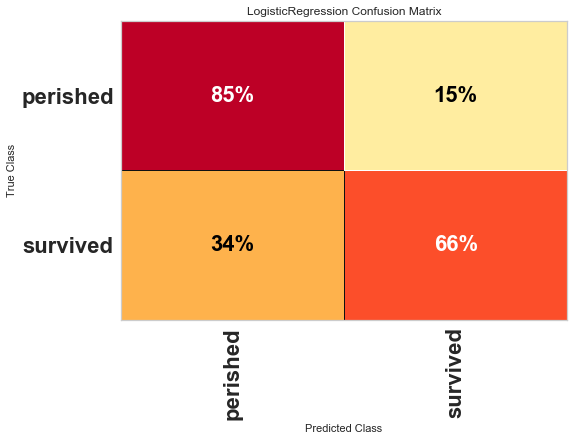

In [16]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['perished','survived'], percent=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();

### Calculate Metrics

In [17]:
Xy_test = pm.concat_to_create_xy_test(X_test, y_test, y_pred)

pm.calc_metrics(Xy_test)

print(metrics.classification_report(y_test, y_pred, target_names=['Perished', 'Survived'], digits=4))

{'log_loss': 7.836603010372443, 'accuracy': 0.773109243697479}

              precision    recall  f1-score   support

    Perished     0.7922    0.8472    0.8188       216
    Survived     0.7381    0.6596    0.6966       141

    accuracy                         0.7731       357
   macro avg     0.7652    0.7534    0.7577       357
weighted avg     0.7708    0.7731    0.7705       357



# Prepare Submission

In [31]:
important_features = ['sex']

In [27]:
holdout_raw =  ExtractData('../data/raw/holdout.csv')
holdout = TransformData(holdout_raw, 
                        fare_mode = train.fare_mode, 
                        embarked_mode = train.embarked_mode, 
                        age_bins = train.age_bins, 
                        Xy_age_estimate = train.Xy_age_estimate)

In [30]:
Xy_holdout = holdout.Xy[features].sort_index()
Xy_holdout

,sex
passengerid,
892,male
893,female
894,male
895,male
896,female
...,...
1305,male
1306,female
1307,male


In [33]:
X_holdout = (pd.get_dummies(Xy_holdout, columns=encoded_features, drop_first=True)
              #.drop(['sex_male', 'pclass_2'], axis=1)
             )
set(X_holdout.columns.tolist())

X_holdout

{'sex_male'}

,sex_male
passengerid,
892,1
893,0
894,1
895,1
896,0
...,...
1305,1
1306,0
1307,1


In [35]:
y_pred = logreg.predict(X_holdout)

y_holdout = pd.Series(y_pred, index=X_holdout.index, name='Survived').to_frame().sort_index()
y_holdout.index.names = ['PassengerId']
y_holdout

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [36]:
y_kaggle_submission = (pd.read_csv('../data/raw/gender_submission.csv')
                       .set_index('PassengerId')
                       .sort_index()
               )
y_kaggle_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [37]:
(y_kaggle_submission.index == y_holdout.index).all()
y_kaggle_submission.index.names == y_holdout.index.names
(y_kaggle_submission.columns == y_holdout.columns).all()

True

True

True

In [38]:
y_holdout.to_csv('logres_gender_only.csv')

In [60]:
lr1 = pd.read_csv('logres_gender_only.csv').set_index('PassengerId').sort_index()
lr2 = pd.read_csv('../data/raw/gender_submission.csv')
lr2 = lr2.set_index('PassengerId')


lr = lr1.join(lr2, lsuffix='_1', rsuffix='_2')
lr['is_equal'] = lr['Survived_1'] == lr['Survived_2']

lr.is_equal.value_counts()

True    418
Name: is_equal, dtype: int64